In [6]:
#import midi_functions
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import callbacks
from keras import optimizers

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [7]:
input_length = 50
X_orig = np.loadtxt('notes/norm50HX.txt')
Y_orig = np.loadtxt('notes/norm50HY.txt')
sorted_notes = np.loadtxt('notes/norm_sorted_notesH.txt')
n = X_orig.shape[0]
Y = np.copy(Y_orig)
max_note = np.max(Y)
min_note = np.min(Y)

X = X_orig / max_note #normalize input
n_notes_Y = n_hidden_units = len(sorted_notes)

for i,note in enumerate(Y): #make all the notes a number between 0 and number_of_different_notes
    Y[i] = np.where(sorted_notes == note)[0]
Y = np_utils.to_categorical(Y)

print('X={}, Y={}'.format(len(np.unique(X)),n_notes_Y))
print('Shape of X: {}'.format(X.shape))
print('Max: {}, Min: {}'.format(max_note, min_note))

X=82, Y=80
Shape of X: (10000, 10)
Max: 106.0, Min: 24.0


In [5]:
model = Sequential()
model.add(LSTM(
    256,
    input_shape=((input_length,1)),
    return_sequences=True
))
model.add(LSTM(n_hidden_units, return_sequences=False))
#model.add(Dropout(0.3))
model.add(Dense(n_hidden_units))
model.add(Activation('softmax'))
rmsprop = optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
# Load the weights to each node
model.load_weights('./weights/normal/395.hdf5')
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 256)           264192    
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                107840    
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
activation_1 (Activation)    (None, 80)                0         
Total params: 378,512
Trainable params: 378,512
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
#Remember to change the name of the log file
class live_plot(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.index = 0
        self.epochs = []
        
        self.losses = []
        self.val_losses = []
        
        self.acc = []
        self.val_acc = []
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.epochs.append(self.index)
        
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs['val_acc'])
        self.index += 1
        
        clear_output(wait=True)
        plt.plot(self.epochs, self.losses, label="loss")
        plt.plot(self.epochs, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
        plt.plot(self.epochs, self.acc, label="acc")
        plt.plot(self.epochs, self.val_acc, label="val_acc")
        plt.legend()
        plt.show();
        
class dump_to_file(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        with open('logs/cross_hijacked_log.txt','wb') as f:
            np.savetxt(f,np.array([logs.get('loss'),logs.get('val_loss'),logs.get('acc'),logs.get('val_acc')]))

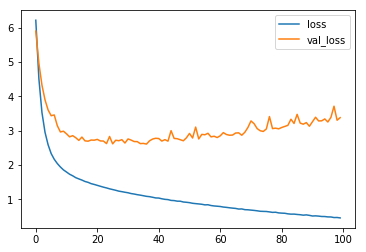

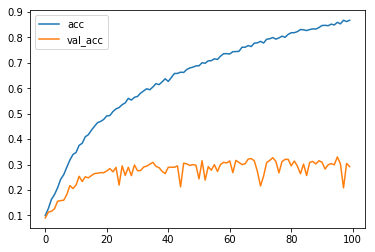

In [8]:
filepath = "./weights/hijacked/cross{epoch:02d}.hdf5"    
checkpoint = ModelCheckpoint(
    filepath, monitor='loss', 
    verbose=0,        
    save_best_only=True,        
    mode='min'
)

plot = live_plot()
dump = dump_to_file()

callbacks_list = [checkpoint, plot, dump]     
fit_data = model.fit(X.reshape(n, input_length, 1), Y, validation_split=0.20,epochs=100, batch_size=64, callbacks=callbacks_list)

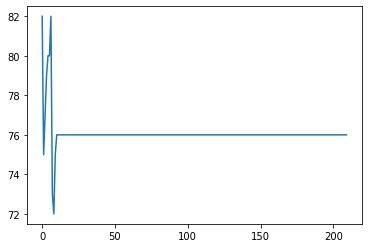

In [152]:
#Generate 200 notes
#model.load_weights('./hijacked_weights/hijacked-125.hdf5')
#random sequence to initialize predictions
init = X[np.random.randint(0,len(X))]

predicted_notes = np.zeros(200 + input_length)
predicted_notes[0:input_length] = init

for note_index in range(200):
    x = predicted_notes[note_index:note_index + input_length]
    prediction = model.predict(x.reshape(1,input_length,1))
    predicted_notes[note_index + input_length] = sorted_notes[np.argmax(prediction)] / max_note
predicted_notes = predicted_notes * max_note
plt.plot(predicted_notes)

In [151]:
predicted_notes

array([70., 43., 55., 79., 78., 74., 73., 74., 71., 71., 72., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73.,
       73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73., 73

In [7]:
midi_functions.create_midi_from_notes(predicted_notes, on=250)

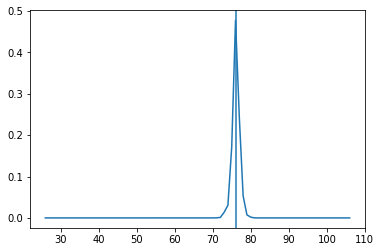

In [159]:
#see what the ouput of softmax looks like
x = X[np.random.randint(0,len(X))]
prediction = model.predict(x.reshape(1,input_length,1))
plt.plot(sorted_notes, prediction.reshape(n_notes_Y))
plt.axvline(x=x[input_length] * max_note)

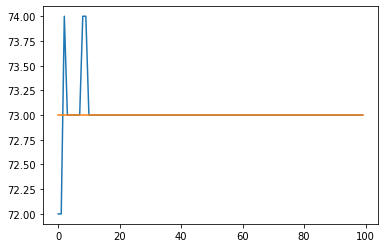

In [160]:
def generate_music_with_bias(bias):
    length = len(bias)
    init = X[np.random.randint(0,len(X))] #Picks out a random training example to begin generation

    predicted_notes = np.zeros(length + input_length)
    predicted_notes[0:input_length] = init
    #predicted_notes[9] = mean / max_note
    
    for note_index, note in enumerate(bias):
        x[0:input_length - 1] = predicted_notes[note_index:note_index + input_length - 1]
        x[input_length - 1] = note / max_note
        prediction = model.predict(x.reshape(1,input_length,1))
        predicted_notes[note_index + input_length] = sorted_notes[np.argmax(prediction)] / max_note
    
    return predicted_notes[input_length:] * max_note
    
bias = np.ones(100) * 73
predicted_notes = generate_music_with_bias(bias)
plt.plot(predicted_notes)
plt.plot(bias)

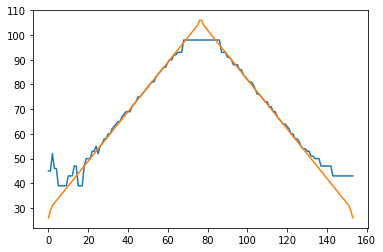

In [161]:
bias = np.concatenate((sorted_notes, sorted_notes[::-1]))
predicted_notes = generate_music_with_bias(bias)
plt.plot(predicted_notes)
plt.plot(bias)

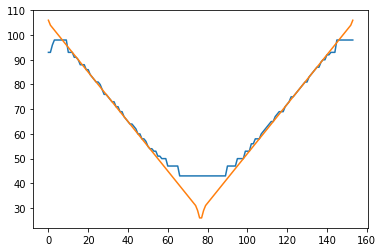

In [162]:
bias = np.concatenate((sorted_notes[::-1], sorted_notes))
predicted_notes = generate_music_with_bias(bias)
plt.plot(predicted_notes)
plt.plot(bias)

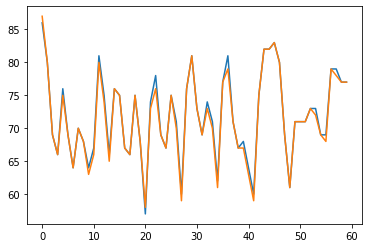

In [163]:
traj = np.loadtxt('data/e_0000.txt')
predicted_notes = generate_music_with_bias(traj)
plt.plot(predicted_notes[:60])
plt.plot(traj[:60])